dot product matrix
[[ 0.1     0.1     0.      0.      0.    ]
 [ 0.1     0.0667  0.      0.      0.    ]
 [ 0.      0.      0.0475  0.01    0.0035]
 [ 0.      0.      0.01    0.01    0.0025]
 [ 0.      0.      0.0035  0.0025  0.01  ]] 

var ratio
[ 0.9338  0.0499] 

transformed coordinate
[[ 0.0899  0.0029]
 [ 0.0686 -0.0019]
 [-0.0573  0.0266]
 [-0.0512 -0.0099]
 [-0.05   -0.0177]]


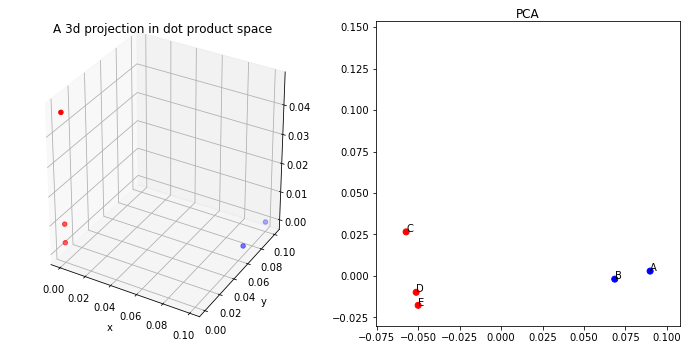

In [9]:
#%matplotlib auto
%matplotlib inline

from glob import glob

from scipy.misc import imread
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from kernel import kernel


def gray(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray


np.set_printoptions(precision=4)
IDs = ['A','B','C','D','E']

x = np.zeros([len(IDs),len(IDs)])
for fileName in sorted(glob('img/ts1/*.png')):
    #print '_'*60
    #print fileName
    img = imread(fileName)
    img = gray(img)
    a,b = fileName.split('/')[-1].split('.')[0].split('-')
    a,b = ord(a)-65, ord(b)-65
    KS = img/1.0
    ki = kernel(KS, sigma=.01)
    x[a][b] = ki
    x[b][a] = ki

print 'dot product matrix'
print x,'\n'

pca = PCA(n_components=2)
pca.fit(x)
print 'var ratio'
print pca.explained_variance_ratio_,'\n'

fig = plt.figure(figsize = [12,6])
ax = fig.add_subplot(121, projection = '3d')
ax.scatter(x[:,0],x[:,1],x[:,2], color = 'bbrrr')
ax.set_title('A 3d projection in dot product space')
ax.set_xlabel('x')
ax.set_ylabel('y')

xCap = pca.transform(x)
print 'transformed coordinate'
print xCap

ax = fig.add_subplot(122)
ax.scatter(xCap[:,0],xCap[:,1], color='bbrrr')

for pt,name in zip(xCap,IDs):
    ax.text(pt[0],pt[1],name)
    
ax.set_title('PCA')
ax.axis('square')

plt.show()